In [1]:
%matplotlib inline

Main Page: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
pd.set_option('display.expand_frame_repr', False)

In [4]:
train_file_path = '../../data/hp/train.csv'
test_file_path = '../../data/hp/test.csv'

In [5]:
dr = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)

# all data use for handling missing data
all_data = pd.concat((dr, test)).reset_index(drop=True)

In [7]:
dr.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
dr.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
id_c = ['Id']
cat_c = ['MSZoning', 'MSSubClass', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
         'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 
         'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
        'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'PavedDrive', 
         'MiscVal', 'SaleType', 'SaleCondition']
num_c = []
ignore_c = ['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'Alley', 'GarageYrBlt', 'Utilities',
           'MasVnrArea', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

In [10]:
def fill_data(all_data):
    all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
        lambda x: x.fillna(x.median()))
    
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        all_data[col] = all_data[col].fillna(0)

    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        all_data[col] = all_data[col].fillna(0)

    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        all_data[col] = all_data[col].fillna('None')

    all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
    all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

    all_data["Functional"] = all_data["Functional"].fillna("Typ")
    
    #'MSZoning missing data '
    all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

    #'Electrical'
    all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

    all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

    all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
    all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

    all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

    all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [11]:
# computing null
null_count = all_data[list(set(cat_c) - set(ignore_c))].isnull().sum()
null_count[null_count > 0].sort_values()

Electrical       1
SaleType         1
Exterior1st      1
KitchenQual      1
Exterior2nd      1
Functional       2
MSZoning         4
MasVnrType      24
BsmtFinType1    79
BsmtFinType2    80
BsmtQual        81
BsmtExposure    82
BsmtCond        82
dtype: int64

In [12]:
# convert all cat column to numeric type
for col_name in cat_c:
    dr[col_name] = dr[col_name].astype('category')
    dr[col_name] = dr[col_name].cat.codes

In [14]:
import seaborn as sns

In [ ]:
dr['SalePrice'].plot()

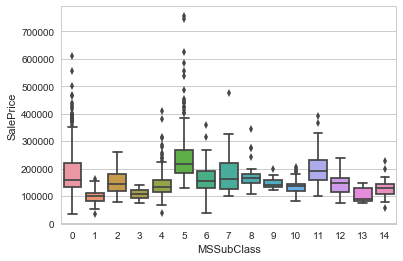

In [15]:
# Display MSSubClass vs SalePrice
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(x="MSSubClass", y="SalePrice", data=dr)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,5,3,104.0,21535,1,-1,0,3,0,...,0,-1,-1,-1,0,1,2007,8,4,755000
1182,1183,5,3,160.0,15623,1,-1,0,3,0,...,555,0,2,-1,0,7,2007,8,0,745000


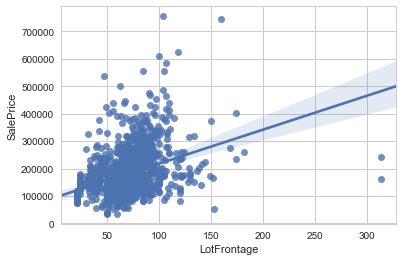

In [72]:
# Display LogFrontage vs SalePrice
sns.regplot(x="LotFrontage", y="SalePrice", data=dr)

dr.query('LotFrontage > 250')
dr.query('SalePrice > 700000').query('LotFrontage < 200')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,5,3,104.0,21535,1,-1,0,3,0,...,0,-1,-1,-1,0,1,2007,8,4,755000
1182,1183,5,3,160.0,15623,1,-1,0,3,0,...,555,0,2,-1,0,7,2007,8,0,745000


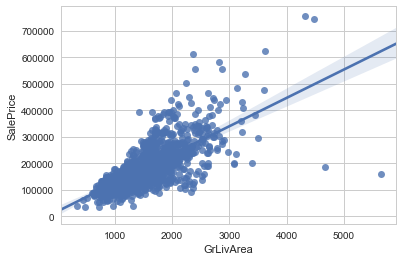

In [73]:
# Display GrLivArea vs SalePrice

sns.regplot(x="GrLivArea", y="SalePrice", data=dr)

dr.query('GrLivArea > 4500')
dr.query('GrLivArea > 4000').query('SalePrice > 700000')

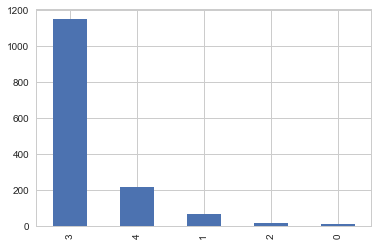

In [20]:
# Show different MSZoning value count
dr['MSZoning'].value_counts().plot(kind='bar')

### Base Models Selection

In [25]:
# XGB
# random forest 

In [26]:
import tensorflow

from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.model_selection import KFold

In [68]:
n_folds = 5
kf = KFold(n_splits=n_folds)

for train_index, test_index in kf.split(dr):
    


1168 292
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 2

In [28]:
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [30]:
from sklearn.linear_model import ElasticNet

In [69]:
enet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)

In [29]:
from sklearn.linear_model import Lasso

In [36]:
lasso = Lasso(alpha =0.0005, random_state=1)

In [42]:
#lasso.fit(
lasso.fit(dr[cat_c], dr[y_column])

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False)

In [56]:
y_pred = lasso.predict(dr[cat_c])
y_pred = pd.DataFrame(y_pred, columns=['y_pred'])

y = pd.concat([dr[y_column], y_pred], axis=1)

,SalePrice,y_pred
0,208500,211217.578195
1,181500,198519.475867
2,223500,240550.859048
3,140000,185892.734464
4,250000,279434.203002
5,143000,142153.970264
6,307000,280844.366629
7,200000,218236.962552
8,129900,183606.622413
9,118000,148701.507812


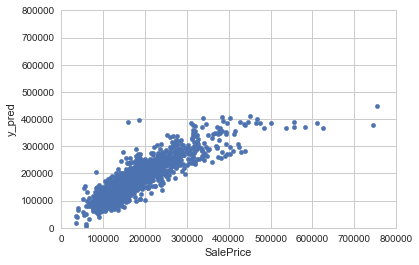

In [62]:
y.plot.scatter(x='SalePrice', y='y_pred', ylim=[0, 800000], xlim=[0,800000])

In [64]:
pd.DataFrame.max(dr['SalePrice'])

755000

In [31]:
from sklearn.kernel_ridge import KernelRidge

In [70]:
krr = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [32]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [33]:
Gbr_model = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [34]:
import xgboost as xgb

In [35]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

### Stacking Models